
# 不同核的先验和后验高斯过程示例

该示例说明了具有不同内核的GPR的先前和后验。 显示了先前和后验的平均值，标准偏差和10个样本。

In [ ]:
%matplotlib inline

#print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct, ConstantKernel)

kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1) #,
#           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
#                                length_scale_bounds=(0.1, 10.0),
#                                periodicity_bounds=(1.0, 10.0)),
#           ConstantKernel(0.1, (0.01, 10.0))
#               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
#           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
#                        nu=1.5)
          ]

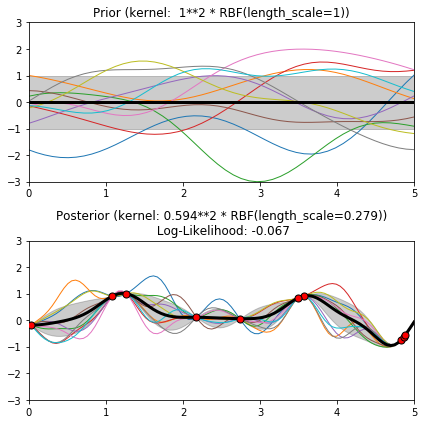

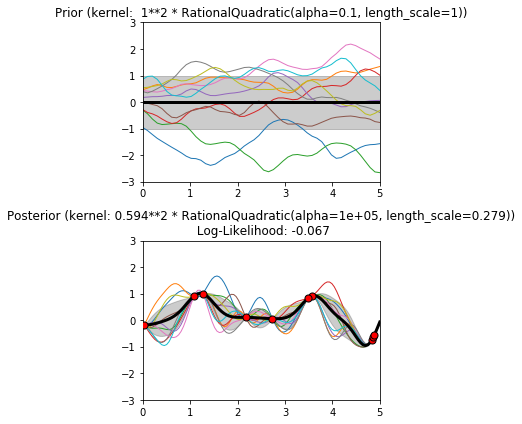

In [37]:
for fig_index, kernel in enumerate(kernels):
    # 指定高斯过程
    gp = GaussianProcessRegressor(kernel=kernel)

    # 绘制先验
    plt.figure(fig_index, figsize=(6, 6))#画布大小
    plt.subplot(2, 1, 1)                 #要生成2行1列，这是第1个图. plt.subplot('行','列','编号')
    X_ = np.linspace(0, 5, 50)          #生成x轴0到5以内的50个均分点，用于后续画图
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True) # np.newaxis表示增加一维，对应这里就是增加一列，
                                                                   # 这里高斯过程预测的标准差为1
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9) #
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5) #设置x轴显示范围
    plt.ylim(-3, 3) #设置y轴显示范围
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # 生成数据并拟合高斯过程
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # 绘制后验
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()